#### From-Scratch Training: TF-IDF + Logistic Regression

In [2]:

# 01_logreg_model_training.ipynb
# Model 1 (From scratch): TF-IDF + Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


#### Load preprocessed data 


In [5]:
df = pd.read_csv("data/processed/disaster_tweets_preprocessed.csv")
print("Data loaded:", df.shape)
df.head()

Data loaded: (2559, 2)


,processed_text,label
0,us drought monitor 2 29 24 happy leap day for ...,drought
1,synonym is #drought,drought
2,across south america in the last two months #f...,flood
3,wildfires going on in texas #wildfires #texasf...,wildfire
4,start your stand up comedy career for 11 99 pu...,storm


In [13]:
df["processed_text"] = df["processed_text"].fillna("")
df = df[df["processed_text"].str.strip() != ""]


#### Train-Test split

In [16]:
X = df["processed_text"]
y = df["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### TF-IDF feature extraction

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2), max_features=20000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf  = tfidf_vectorizer.transform(X_test)

print("TF-IDF Train shape:", X_train_tfidf.shape)

TF-IDF Train shape: (2046, 20000)


#### Train Logistic Regression Model (From scratch)

In [22]:
start_time = time.time()

logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(X_train_tfidf, y_train)

train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds")

Training completed in 0.72 seconds


#### Evalute Model

In [25]:
pred = logreg_model.predict(X_test_tfidf)

acc = accuracy_score(y_test, pred)
print(f"\nFinal Test Accuracy: {acc:.4f} ({acc*100:.2f}%)\n")

print("Classification Report:\n")
print(classification_report(y_test, pred))


Final Test Accuracy: 0.9805 (98.05%)

Classification Report:

              precision    recall  f1-score   support

     drought       0.96      1.00      0.98       133
  earthquake       0.99      1.00      0.99        99
       flood       1.00      0.94      0.97       108
       other       0.00      0.00      0.00         1
       storm       0.98      1.00      0.99        57
    wildfire       0.98      0.97      0.98       114

    accuracy                           0.98       512
   macro avg       0.82      0.82      0.82       512
weighted avg       0.98      0.98      0.98       512



#### Confusion Matrix

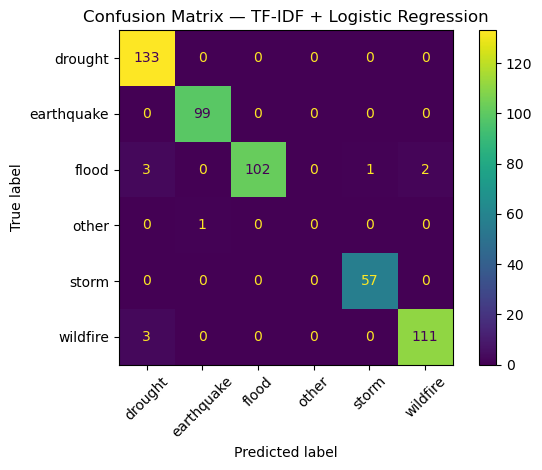

In [28]:
labels_sorted = sorted(y.unique())
cm = confusion_matrix(y_test, pred, labels=labels_sorted)

ConfusionMatrixDisplay(cm, display_labels=labels_sorted).plot(xticks_rotation=45)
plt.title("Confusion Matrix — TF-IDF + Logistic Regression")
plt.tight_layout()
plt.show()

#### Save model + vectorizer 

In [31]:
with open("logreg_model.pkl", "wb") as f:
    pickle.dump(logreg_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("LogReg model and TF-IDF vectorizer saved successfully.")

LogReg model and TF-IDF vectorizer saved successfully.


#### Save model

In [34]:
with open("logreg_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

sample_text = ["earthquake hits city, people panic and buildings shaking"]
sample_vec = loaded_vectorizer.transform(sample_text)
print("Sample prediction:", loaded_model.predict(sample_vec)[0])


Sample prediction: earthquake
